In [1]:
using Plots
gr(size=(600,400))
plot(rand(3))
contour(-2:0.5:2, -2:0.5:2, (x,y)->x^2+y^2)
nothing

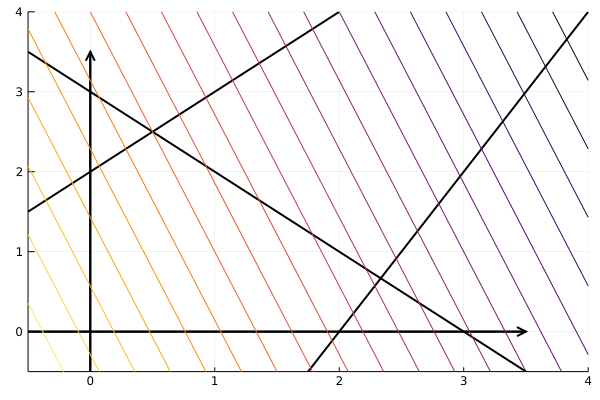

In [2]:
plot([-0.5, 3.5], [0, 0], c=:black, lw=2, l=:arrow, leg=false)
plot!([0, 0], [-0.5, 3.5], c=:black, lw=2, l=:arrow)
plot!(t -> 2 + t, -0.5, 2, c=:black, lw=2)
plot!(t -> 3 - t, -0.5, 4, c=:black, lw=2)
plot!(t -> -4 + 2t, -0.5, 4, c=:black, lw=2)

c = [-3.0; -1.0]
contour!(-0.5:0.5:4, -0.5:0.5:4, (x,y) -> c[1] * x + c[2] * y, levels=20, leg=false)

xlims!(-0.5, 4.0)
ylims!(-0.5, 4.0)

\begin{align*}
 \min \qquad & -3x_1 - x_2 \\
 \text{suj. a} \qquad &
     \quad x_1 + x_2 + x_3 \qquad \quad = 3 \\
 &   -x_1 + x_2 + \quad \ \ x_4 \quad \ \ \ \! = 2 \\
 &   \ \ \ 2x_1 - x_2 + \quad \qquad x_5 = 4 \\
 &   \quad x \geq 0
\end{align*}

In [13]:
A = [
    1.0 1.0 1.0 0 0;
    -1.0 1.0 0 1.0 0;
    2.0 -1.0 0 0 1.0
]
b = [3.0; 2.0; 4.0]
c = [-3.0; -1.0; 0; 0; 0]

5-element Array{Float64,1}:
 -3.0
 -1.0
  0.0
  0.0
  0.0

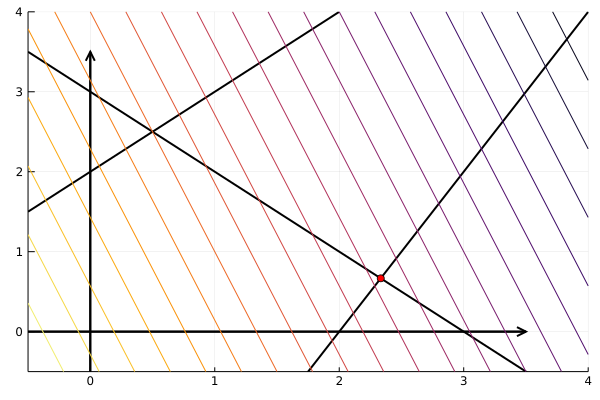

In [43]:
IB = [1, 4, 2]
B = A[:,IB]
x = zeros(5)
x[IB] = B \ b
y = B' \ c[IB]
c̄ = c - A' * y

plot([-0.5, 3.5], [0, 0], c=:black, lw=2, l=:arrow, leg=false)
plot!([0, 0], [-0.5, 3.5], c=:black, lw=2, l=:arrow)
plot!(t -> 2 + t, -0.5, 2, c=:black, lw=2)
plot!(t -> 3 - t, -0.5, 4, c=:black, lw=2)
plot!(t -> -4 + 2t, -0.5, 4, c=:black, lw=2)

contour!(-0.5:0.5:4, -0.5:0.5:4, (x,y) -> c[1] * x + c[2] * y, levels=20, leg=false)

scatter!([x[1]], [x[2]], c=:red, ms=4)

for j = findall(c̄ .< -1e-12)
    d = zeros(5)
    d[j] = 1
    d[IB] = B \ -A[:,j]
    plot!([x[1], x[1] + d[1]], [x[2], x[2] + d[2]], c=:red, l=:arrow, lw=2)
    J = findall(d .< 0)
    k = argmin(-x[J] ./ d[J])
    k = J[k]
    θ = -x[k] / d[k]
    plot!([x[1], x[1] + θ * d[1]], [x[2], x[2] + θ * d[2]], c=:gold, l=:arrow, lw=1)
    println("Pode ser j = $j ↔ k = $k")
end

xlims!(-0.5, 4.0)
ylims!(-0.5, 4.0)

In [25]:
c̄

5-element Array{Float64,1}:
  0.0
 -1.1102230246251565e-16
  1.6666666666666665
  0.0
  0.6666666666666666

In [28]:
d

5-element Array{Float64,1}:
  0.5
  1.0
 -1.5
 -0.5
  0.0

In [30]:
J = findall(d .< 0)

2-element Array{Int64,1}:
 3
 4

In [31]:
x[J], d[J], -x[J] ./ d[J]

([1.0, 4.0], [-1.5, -0.5], [0.6666666666666666, 8.0])

In [32]:
argmin( -x[J] ./ d[J])

1